In [1]:
import torch
import torchvision
from torchvision import datasets,transforms, models
import os
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable 
import time
%matplotlib inline

In [ ]:
transforms.Resize(0.)

In [7]:
os.listdir(os.path.join(path, 'train'))

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg',
 'cat.10005.jpg',
 'cat.10006.jpg',
 'cat.10007.jpg',
 'cat.10008.jpg',
 'cat.10009.jpg',
 'cat.1001.jpg',
 'cat.10010.jpg',
 'cat.10011.jpg',
 'cat.10012.jpg',
 'cat.10013.jpg',
 'cat.10014.jpg',
 'cat.10015.jpg',
 'cat.10016.jpg',
 'cat.10017.jpg',
 'cat.10018.jpg',
 'cat.10019.jpg',
 'cat.1002.jpg',
 'cat.10020.jpg',
 'cat.10021.jpg',
 'cat.10022.jpg',
 'cat.10023.jpg',
 'cat.10024.jpg',
 'cat.10025.jpg',
 'cat.10026.jpg',
 'cat.10027.jpg',
 'cat.10028.jpg',
 'cat.10029.jpg',
 'cat.1003.jpg',
 'cat.10030.jpg',
 'cat.10031.jpg',
 'cat.10032.jpg',
 'cat.10033.jpg',
 'cat.10034.jpg',
 'cat.10035.jpg',
 'cat.10036.jpg',
 'cat.10037.jpg',
 'cat.10038.jpg',
 'cat.10039.jpg',
 'cat.1004.jpg',
 'cat.10040.jpg',
 'cat.10041.jpg',
 'cat.10042.jpg',
 'cat.10043.jpg',
 'cat.10044.jpg',
 'cat.10045.jpg',
 'cat.10046.jpg',
 'cat.1004

数据载入

In [ ]:
##数据载入详解##

#train_data = torchvision.datasets.MNIST(
   # root='./mnist/',
  #  train=True,                                     # this is training data
  #  transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
   # download=DOWNLOAD_MNIST,                        # download it if you don't have it
#)

#ImageFolder和这个导入后类似， 属于datsets对象
#再放到torch.util.data.Dataloader里面  生成是dataloader对象(可迭代) 迭代出来后 每个是list  里面含有tensor和label

In [43]:
data_img = datasets.ImageFolder(root = '../cat_vs_dog_datasets/train',transform = transform)
data_img

Dataset ImageFolder
    Number of datapoints: 3
    Root Location: ../cat_vs_dog_datasets/train
    Transforms (if any): Compose(
                             CenterCrop(size=(224, 224))
                             ToTensor()
                             Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
                         )
    Target Transforms (if any): None

In [45]:
data_img.class_to_idx

{'cat': 0}

In [63]:
data_img.imgs

[('../cat_vs_dog_datasets/train\\cat\\cat.1.jpg', 0),
 ('../cat_vs_dog_datasets/train\\cat\\cat.3.jpg', 0),
 ('../cat_vs_dog_datasets/train\\cat\\cat.4.jpg', 0)]

In [46]:
path = "..\cat_vs_dog_datasets"

##此处有坑 ，，， 必须先CenterCrop  如果先ToTensor  会出错 resize一样
transform = transforms.Compose([transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])])

data_image = {x:datasets.ImageFolder(root = os.path.join(path,x),
                                     transform = transform)
              for x in ["train", "val"]}

data_loader_image = {x:torch.utils.data.DataLoader(dataset=data_image[x],
                                                batch_size = 4,
                                                shuffle = True)
                     for x in ["train", "val"]}

In [60]:
torch.utils.data.DataLoader(dataset=data_image['train'],
                                                batch_size = 4,
                                                shuffle = True)

In [50]:
data_loader_image

{'train': <torch.utils.data.dataloader.DataLoader at 0x13990eb8>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x13990b00>}

In [92]:
use_gpu = torch.cuda.is_available()
print(use_gpu)

False


查看训练数据的类别

In [47]:
classes = data_image["train"].classes
classes_index = data_image["train"].class_to_idx
print(classes)
print(classes_index)

['cat', 'dog']
{'cat': 0, 'dog': 1}


0代表的是猫 1代表的狗

数据集个数

In [48]:
print(u"训练集个数:", len(data_image["train"]))
print(u"验证集个数:", len(data_image["val"]))

训练集个数: 20000
验证集个数: 4888


In [51]:
X_train.shape

torch.Size([4, 3, 224, 224])

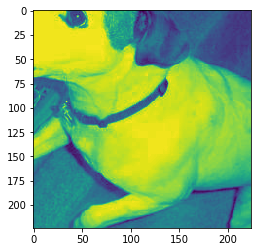

In [56]:
plt.imshow(X_train[0, 0, :, :])

In [57]:
help(iter)

Help on built-in function iter in module builtins:

iter(...)
    iter(iterable) -> iterator
    iter(callable, sentinel) -> iterator
    
    Get an iterator from an object.  In the first form, the argument must
    supply its own iterator, or be a sequence.
    In the second form, the callable is called until it returns the sentinel.



In [62]:
for i in data_loader_image["train"]:
    print(type(i))
    print(len(i))
    print(i)
    break

<class 'list'>
2
[tensor([[[[-0.6392, -0.6392, -0.6314,  ...,  0.8039,  0.8039,  0.8039],
          [-0.6235, -0.6235, -0.6235,  ...,  0.8039,  0.7961,  0.7961],
          [-0.6078, -0.6078, -0.6078,  ...,  0.8039,  0.8039,  0.8039],
          ...,
          [-0.8510, -0.8196, -0.8353,  ..., -0.7961, -0.7961, -0.8039],
          [-0.8353, -0.8196, -0.8196,  ..., -0.7961, -0.8275, -0.8196],
          [-0.8275, -0.8196, -0.8196,  ..., -0.8039, -0.8118, -0.8039]],

         [[-0.6863, -0.6863, -0.6784,  ...,  0.8353,  0.8196,  0.8196],
          [-0.6941, -0.6941, -0.6941,  ...,  0.8353,  0.8118,  0.8118],
          [-0.6784, -0.6784, -0.6784,  ...,  0.8353,  0.8196,  0.8196],
          ...,
          [-0.9294, -0.8980, -0.9137,  ..., -0.8196, -0.8039, -0.8118],
          [-0.8980, -0.8980, -0.8980,  ..., -0.8196, -0.8353, -0.8275],
          [-0.8902, -0.8824, -0.8824,  ..., -0.8196, -0.8431, -0.8353]],

         [[-0.6706, -0.6706, -0.6627,  ...,  0.8275,  0.8118,  0.8118],
          [-

预览训练集合

['dog', 'dog', 'cat', 'dog']


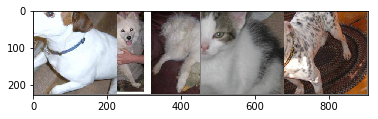

In [49]:
X_train, y_train = next(iter(data_loader_image["train"]))
mean = [0.5,0.5,0.5]
std  = [0.5,0.5,0.5]
img = torchvision.utils.make_grid(X_train)
img = img.numpy().transpose((1,2,0))
img = img*std+mean

print([classes[i] for i in y_train])
plt.imshow(img)

In [37]:
vgg16 = torch.load('vgg16.pkl')

In [38]:
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [81]:
model = models.vgg16(pretrained=True)

In [73]:
torch.save(model, 'vgg16.pkl')

In [82]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [83]:
for parma in model.parameters():
    print(parma.requires_grad)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [84]:
for parma in model.parameters():
    parma.requires_grad = False

In [85]:
for parma in model.parameters():
    print(parma.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [86]:
model.classifier = torch.nn.Sequential(torch.nn.Linear(25088, 4096),
                                       torch.nn.ReLU(),
                                       torch.nn.Dropout(p=0.5),
                                       torch.nn.Linear(4096, 4096),
                                       torch.nn.ReLU(),
                                       torch.nn.Dropout(p=0.5),
                                       torch.nn.Linear(4096, 2))

    
# if use_gpu:
#     model = model.cuda()


cost = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.classifier.parameters())

In [87]:
for parma in model.parameters():
    print(parma.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True


In [88]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [31]:
model.state_dict() ##存着所有参数的字典

OrderedDict([('features.0.weight', tensor([[[[-0.5537,  0.1427,  0.5290],
                        [-0.5831,  0.3566,  0.7657],
                        [-0.6902, -0.0480,  0.4841]],
              
                       [[ 0.1755,  0.0099, -0.0814],
                        [ 0.0441, -0.0703, -0.2604],
                        [ 0.1324, -0.1728, -0.1323]],
              
                       [[ 0.3130, -0.1659, -0.4275],
                        [ 0.4752, -0.0827, -0.4870],
                        [ 0.6320,  0.0193, -0.2775]]],
              
              
                      [[[ 0.2325,  0.1267,  0.1861],
                        [-0.4281, -0.2435,  0.2463],
                        [-0.2507,  0.1418, -0.0055]],
              
                       [[-0.1408, -0.2190,  0.1504],
                        [-0.8413, -0.3518,  0.5640],
                        [-0.2419,  0.5193,  0.5391]],
              
                       [[-0.3143, -0.3705, -0.1309],
                        [-0.4714, -

In [90]:
use_gpu = False

In [91]:
n_epochs = 1
for epoch in range(n_epochs):
    since = time.time()
    print("Epoch{}/{}".format(epoch, n_epochs))
    print("-"*10)
    for param in ["train", "val"]:
        if param == "train":
            model.train = True
        else:
            model.train = False

        running_loss = 0.0
        running_correct = 0 
        batch = 0
        for data in data_loader_image[param]:
            batch += 1
            X, y = data
            if use_gpu:
                X, y  = Variable(X.cuda()), Variable(y.cuda())
            else:
                X, y = Variable(X), Variable(y)
        
            optimizer.zero_grad()
            y_pred = model(X)
            _, pred = torch.ma+
            x(y_pred.data, 1)
        
            loss = cost(y_pred, y)
            if param =="train":
                loss.backward()
                optimizer.step()
            running_loss += loss.data[0]
            running_correct += torch.sum(pred == y.data)
            if batch%500 == 0 and param =="train":
                print("Batch {}, Train Loss:{:.4f}, Train ACC:{:.4f}".format(
                      batch, running_loss/(4*batch), 100*running_correct/(4*batch)))
            
        epoch_loss = running_loss/len(data_image[param])
        epoch_correct = 100*running_correct/len(data_image[param])

        print("{}  Loss:{:.4f},  Correct{:.4f}".format(param, epoch_loss, epoch_correct))
    now_time = time.time() - since   
    print("Training time is:{:.0f}m {:.0f}s".format(now_time//60, now_time%60))

Epoch0/1
----------


D:\annoconda\lib\site-packages\ipykernel_launcher.py:31: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Batch 500, Train Loss:0.6019, Train ACC:86.0000
Batch 1000, Train Loss:0.5583, Train ACC:88.0000
Batch 1500, Train Loss:0.5363, Train ACC:88.0000
Batch 2000, Train Loss:0.5393, Train ACC:89.0000


KeyboardInterrupt: 

In [12]:
torch.save(model.state_dict(), "model_vgg16_finetune.pkl")

In [13]:
data_test_img = datasets.ImageFolder(root="test",
                                     transform = transform)
data_loader_test_img = torch.utils.data.DataLoader(dataset=data_test_img,
                                                   batch_size = 16)

In [14]:
image, label = next(iter(data_loader_test_img))
images = Variable(image.cuda())
y_pred = model(images)
_, pred = torch.max(y_pred.data, 1)
print(pred)


 1
 0
 0
 1
 1
 0
 0
 1
 0
 0
 0
 0
 0
 0
 0
 1
[torch.cuda.LongTensor of size 16 (GPU 0)]



Pred Label: ['dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog']


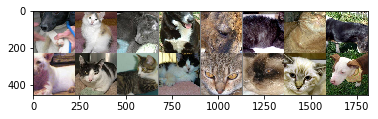

In [15]:
img = torchvision.utils.make_grid(image)
img = img.numpy().transpose(1,2,0)
mean = [0.5,0.5,0.5]
std  = [0.5,0.5,0.5]
img = img*std+mean
print("Pred Label:",[classes[i] for i in pred])
plt.imshow(img)